In [16]:
# Title:  State Wise Comparison of Covid-19
# Author: Zhenxiang Xu

In [1]:
# Introduction

# In this project, I'm attempting to analyze the Mortality, Infection, Recovery, and Incident rates between five different states. 
# They are: Ner York, Maryland, Florida, Texas and California.
# Their are three main reasons for choosing this five states:

# First, they are the largest state in the United States, both in terms of population and economy.  
# Except Maryland, MD has been chosen simply because I lived in here
# Second, they all located differently around the U.S. Coastline. 
# Meaning they They should be the most vulnerable areas and be able to provide more information.
# Third, computational cost, my cheap laptop can't afford doing too many analysis for many states and datas.

# By performing statistical tests and analysis, try to determine if any states are significantly safer or more dangerous than others, 
# in hopes of better understanding the virus and its dangers.

# The data used here comes from the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. 
# The link to the datasets will be provided here: 
# https://github.com/CSSEGISandData/COVID-19. 

import numpy as np
import requests as req
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


In [2]:
# Part 1: Data Collection

start = datetime.datetime.strptime('04-13-2020', '%m-%d-%Y')
end = datetime.datetime.strptime('05-13-2021', '%m-%d-%Y')
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
df = pd.DataFrame()
# setting the start date and end date for the data need.  

for date in date_generated:
    url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports_us/' + date.strftime('%m-%d-%Y') + '.csv?raw=true'
    df = df.append(pd.read_csv(url))
# Since this project would be focusing on the states, 
# I'm reading every csv file from the Covid-19-master_March12/csse_covid_19_data/csse_covid_19_daily_reports_us/ folder,
# with each row represents a state's, or a specific place's, statistics on a particular day.


In [3]:
df_NY = df[df['Province_State'] == 'New York']
df_MD = df[df['Province_State'] == 'Maryland']
df_FL = df[df['Province_State'] == 'Florida']
df_TX = df[df['Province_State'] == 'Texas']
df_CA = df[df['Province_State'] == 'California']
# selecting the five states that would be examinated in this project.

In [4]:
# Part 2: Data Representation

df.info()
# Here is the official explaination from the source about what each column represents in this dataframe:

# Province_State - The name of the State within the USA.
# Country_Region - The name of the Country (US).
# Last_Update - The most recent date the file was pushed.
# Lat - Latitude.
# Long_ - Longitude.
# Confirmed - Aggregated case count for the state.
# Deaths - Aggregated death toll for the state.
# Recovered - Aggregated Recovered case count for the state.
# Active - Aggregated confirmed cases that have not been resolved (Active cases = total cases - total recovered - total deaths).
# FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
# Incident_Rate - cases per 100,000 persons.
# Total_Test_Results - Total number of people who have been tested.
# People_Hospitalized - Total number of people hospitalized. (Nullified on Aug 31, see Issue #3083)
# Case_Fatality_Ratio - Number recorded deaths * 100/ Number confirmed cases.
# UID - Unique Identifier for each row entry.
# ISO3 - Officialy assigned country code identifiers.
# Testing_Rate - Total test results per 100,000 persons. The "total test results" are equal to "Total test results (Positive + Negative)" from COVID Tracking Project.
# Hospitalization_Rate - US Hospitalization Rate (%): = Total number hospitalized / Number cases. The "Total number hospitalized" is the "Hospitalized – Cumulative" count from COVID Tracking Project. 
#                        The "hospitalization rate" and "Total number hospitalized" is only presented for those states which provide cumulative hospital data. (Nullified on Aug 31, see Issue #3083)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22927 entries, 0 to 57
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        22927 non-null  object 
 1   Country_Region        22927 non-null  object 
 2   Last_Update           22911 non-null  object 
 3   Lat                   22120 non-null  float64
 4   Long_                 22120 non-null  float64
 5   Confirmed             22927 non-null  int64  
 6   Deaths                22927 non-null  int64  
 7   Recovered             15093 non-null  float64
 8   Active                19024 non-null  float64
 9   FIPS                  22910 non-null  float64
 10  Incident_Rate         22120 non-null  float64
 11  People_Tested         11760 non-null  float64
 12  People_Hospitalized   5080 non-null   float64
 13  Mortality_Rate        11970 non-null  float64
 14  UID                   22927 non-null  float64
 15  ISO3                  

In [5]:
# Part 3: Data Analysis

# From now on, this project would be focusing on five major States for a better analysis,
# each state would be located differently 

def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(round(B0,3), round(B1, 3))
    
    return (B0, B1, reg_line)
# This is the linear regression funtion that can be used to find the predicted slope later.


Text(0.5, 1.0, 'All Five States: Death vs Confirmed:  y = 6939.296 + 0.014β')

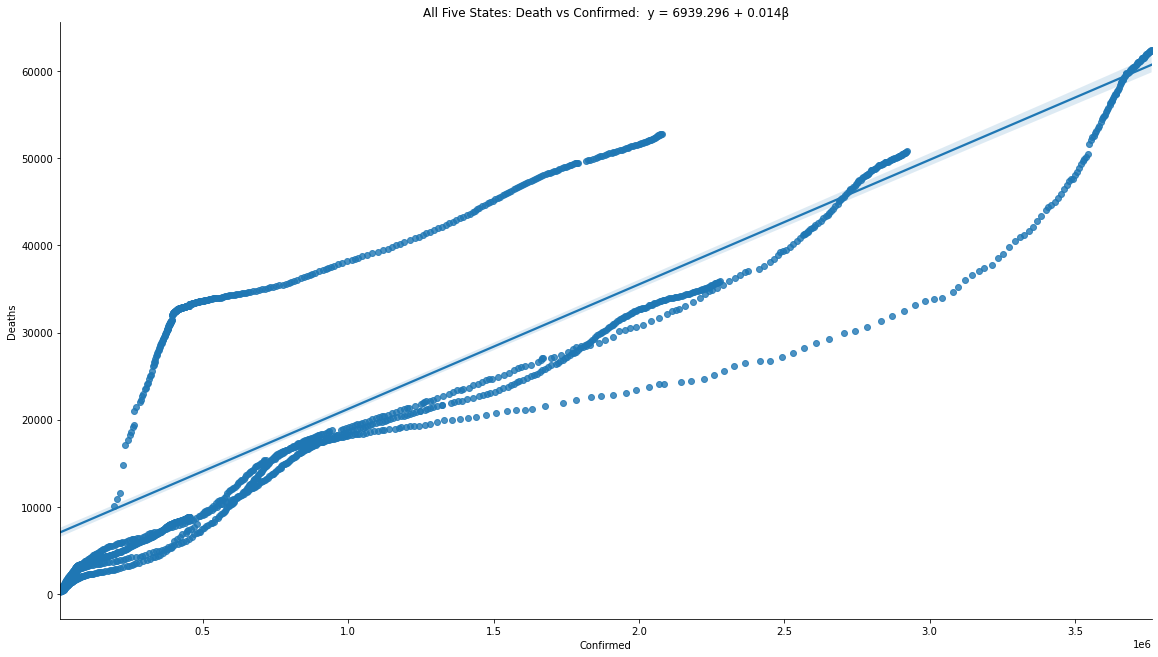

In [6]:
# Part 3.1 : Mortality Rate
# def:  
# Case_Fatality_Ratio - Number recorded deaths * 100/ Number confirmed cases.
#                       AKA Mortality_Rate

# Before going into more detailed comparison, let's go for a general analysis about the mortality rate.

df_Total = df_NY.append([df_MD,df_FL,df_TX,df_CA])
# making one dataframe for a general analysis.

numbers = linear_regression(df_Total['Confirmed'],df_Total['Deaths'])
# getting the linear regression equation

sns.lmplot(x="Confirmed", y="Deaths",height=9, aspect=16/9, data=df_Total)
ax = plt.gca()
ax.set_title("All Five States: Death vs Confirmed:" + '  ' +numbers[2])
# ploting the general linear regression line.


Text(0.5, 1.0, 'Each States: Death vs Confirmed')

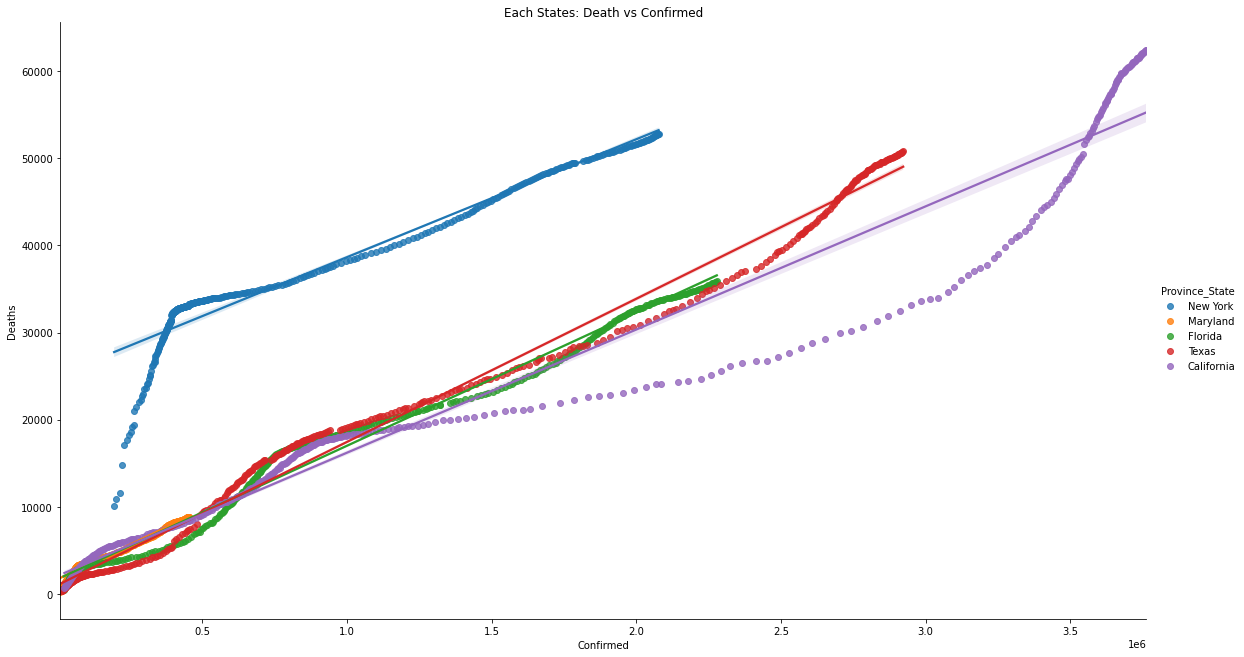

In [7]:
sns.lmplot(x="Confirmed", y="Deaths", hue = "Province_State",height=9, aspect=16/9, data=df_Total);
ax = plt.gca()
ax.set_title("Each States: Death vs Confirmed")
# ploting the linear regression line for each state.
# We can see there are not a significant differences between the slope of regression lines.
# Meannign interms of mortality rate, all the states tends to have a same performance.

In [8]:
# showing each states predicted slope found from  linear regression 
numbers_NY = linear_regression(df_NY['Confirmed'],df_NY['Deaths'])
numbers_MD = linear_regression(df_MD['Confirmed'],df_MD['Deaths'])
numbers_FL = linear_regression(df_FL['Confirmed'],df_FL['Deaths'])
numbers_TX = linear_regression(df_TX['Confirmed'],df_TX['Deaths'])
numbers_CA = linear_regression(df_CA['Confirmed'],df_CA['Deaths'])

print('for New York, the slope of Death/Confirmed is:'+ str(numbers_NY[1]))
print('for Maryland, the slope of Death/Confirmed is:'+ str(numbers_MD[1]))
print('for Florida, the slope of Death/Confirmed is:'+ str(numbers_FL[1]))
print('for Texas, the slope of Death/Confirmed is:'+ str(numbers_TX[1]))
print('for California, the slope of Death/Confirmed is:'+ str(numbers_CA[1]))
# It seems that the numbers here are also consistent with the above point

for New York, the slope of Death/Confirmed is:0.013530476028426738
for Maryland, the slope of Death/Confirmed is:0.01591355128144186
for Florida, the slope of Death/Confirmed is:0.015297626965500815
for Texas, the slope of Death/Confirmed is:0.016428226667506568
for California, the slope of Death/Confirmed is:0.014134460320435648


Text(0.5, 1.0, 'Boxplot for Mortality Rate of each state')

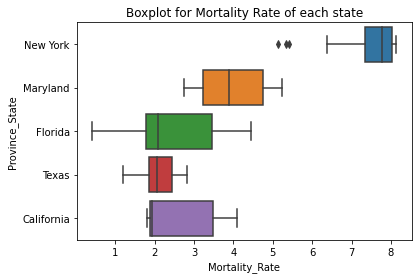

In [9]:
# using boxplot to show the variance of the Mortality Rate for each state.
ax = sns.boxplot(x="Mortality_Rate", y="Province_State",data=df_Total)
ax = plt.gca()
ax.set_title("Boxplot for Mortality Rate of each state")

# New York tends to have a higher Mortality Rate here. 
# This can acutally be seen from the linear regression plot, too.
# Since NY tends to have a higher intercept than other states.

# But does this means NY is more dangerous than other states? 
# I would neeed more analysis to find out

Text(0.5, 1.0, 'Boxplot for Recovery Rate of each state')

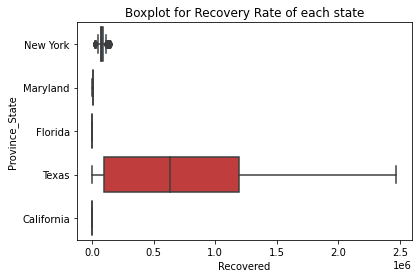

In [10]:
# Part 3.2 : Recovery Rate
# def: 
# Recovered - Aggregated Recovered case count for the state.

# This time, I would like to use box plot to compare each states' perfermance about recovering to see if NY is actually a dangerous state.
ax = sns.boxplot(x="Recovered", y="Province_State",data=df_Total)
ax = plt.gca()
ax.set_title("Boxplot for Recovery Rate of each state")

# As the plot shows, FL and CL are not showing any statistical data for comparison in Recovery Rate at all.  
# This is not sufficient for comparison.
# The only conclusion I can get from here is only TX is serious about recording Recovery Rate in this dataset.

Text(0.5, 1.0, 'Boxplot for Testing Rate of each state')

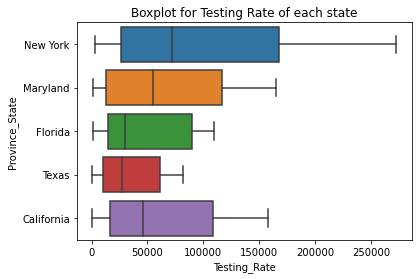

In [11]:
# Part 3.3 : Testing Rate
# def: 
# Testing_Rate - Total test results per 100,000 persons. 
# The "total test results" are equal to "Total test results (Positive + Negative)" from COVID Tracking Project.

# Since comparing Recovery Rate can't actually provide any useful information, 
# I decide to go with comparing Tested Rate to find out if there is a more safe/dangerous state.

ax = sns.boxplot(x="Testing_Rate", y="Province_State",data=df_Total)
ax = plt.gca()
ax.set_title("Boxplot for Testing Rate of each state")
# In terms of variance, NY tends to have the best overall performance at testing.

Text(0.5, 1.0, 'Lineplot for the increasing trend of Testing Rate of each state')

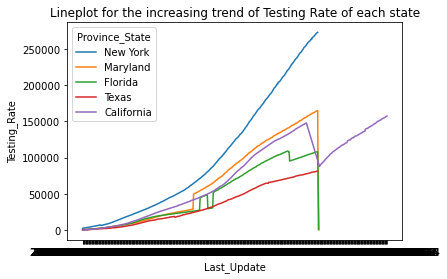

In [12]:
sns.lineplot(data=df_Total, x='Last_Update', y='Testing_Rate', hue='Province_State')
ax = plt.gca()
ax.set_title("Lineplot for the increasing trend of Testing Rate of each state")
# This plot also support the point that NY is doing better at testing people. 
# But the records stoped at one point for unknown reason.


Text(0.5, 1.0, 'Boxplot for Incident Rate of each state')

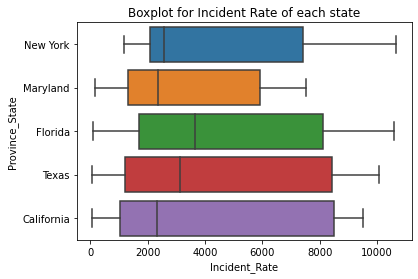

In [13]:
# Part 3.4 : Incident Rate
# def:
# Incident_Rate - cases per 100,000 persons.

# Till now, NY is the worst at Mortality Rate but the best at Testing Rate.
# While TX is exactly the opposite, it's the best at Mortality Rate but the worst at Testing Rate.

# For a better comparison, I would like to see the differences betweeen Incident Rate this time.

ax = sns.boxplot(x="Incident_Rate", y="Province_State",data=df_Total)
ax = plt.gca()
ax.set_title("Boxplot for Incident Rate of each state")
# All five states tends to have a same level of performance, with Maryland seems to have a slight advantage.

Text(0.5, 1.0, 'Lineplot for the increasing trend of Incident Rate of each state')

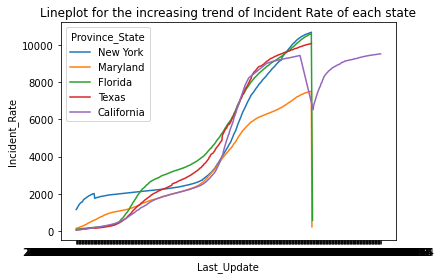

In [14]:
sns.lineplot(data=df_Total, x='Last_Update', y='Incident_Rate', hue='Province_State')
ax = plt.gca()
ax.set_title("Lineplot for the increasing trend of Incident Rate of each state")
# This plot also support the point that MD is doing a little better at Incident Rate. 
# Again,the records stoped at one point for unknown reason.

In [15]:
# Conclusion

# As conclusion, I started to believe that there is no ideally safer state exist, 
# NY and TX are the most convincing materials to me at this point. 
# Maybe I shouldn't started to think about move to other states from the first. 
# It seems like all of us are facing same terrible situation. 
# Runing to other states would not make any help.
# But there is a safer option, that would highly increase my chance of surviving: Stay at home.